### Import dependecies

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### Read the data

In [2]:
data_patients = pd.read_csv("C:/Users/Jad/Desktop/Projects_DataScience/Detecting Parkinson's Disease/data/parkinsons.data")

### Get the features and labels

In [3]:
features = data_patients.loc[:,data_patients.columns!='status'].values[:,1:]
labels = data_patients.loc[:,'status'].values

In [4]:
data_patients.status.value_counts()

1    147
0     48
Name: status, dtype: int64

### Normalize the features

Our features have multiple scales. We will initialize a MinMaxScaler in order to scale the features.

In [5]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

Split the dataset into training and testing sets

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

### Initialize a Logistic Regression Model

In [7]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred = model.predict(x_test)

In [9]:
print(round(accuracy_score(y_test, y_pred)*100,2))

84.62


In [10]:
print(classification_report(y_test, y_pred, target_names=['Sick','Not sick']))

              precision    recall  f1-score   support

        Sick       0.70      0.70      0.70        10
    Not sick       0.90      0.90      0.90        29

    accuracy                           0.85        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.85      0.85      0.85        39



### Features importance

In [11]:
importance = model.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.63810
Feature: 1, Score: -0.45800
Feature: 2, Score: -0.25953
Feature: 3, Score: -0.31781
Feature: 4, Score: -0.13097
Feature: 5, Score: 0.08674
Feature: 6, Score: -0.12494
Feature: 7, Score: 0.08706
Feature: 8, Score: 0.49966
Feature: 9, Score: 0.39456
Feature: 10, Score: 0.29249
Feature: 11, Score: 0.49040
Feature: 12, Score: 0.53475
Feature: 13, Score: 0.29228
Feature: 14, Score: -0.21791
Feature: 15, Score: 0.11140
Feature: 16, Score: -0.86929
Feature: 17, Score: 0.38571
Feature: 18, Score: 1.70640
Feature: 19, Score: 1.28767
Feature: 20, Score: 1.20708
Feature: 21, Score: 1.43002


<BarContainer object of 22 artists>

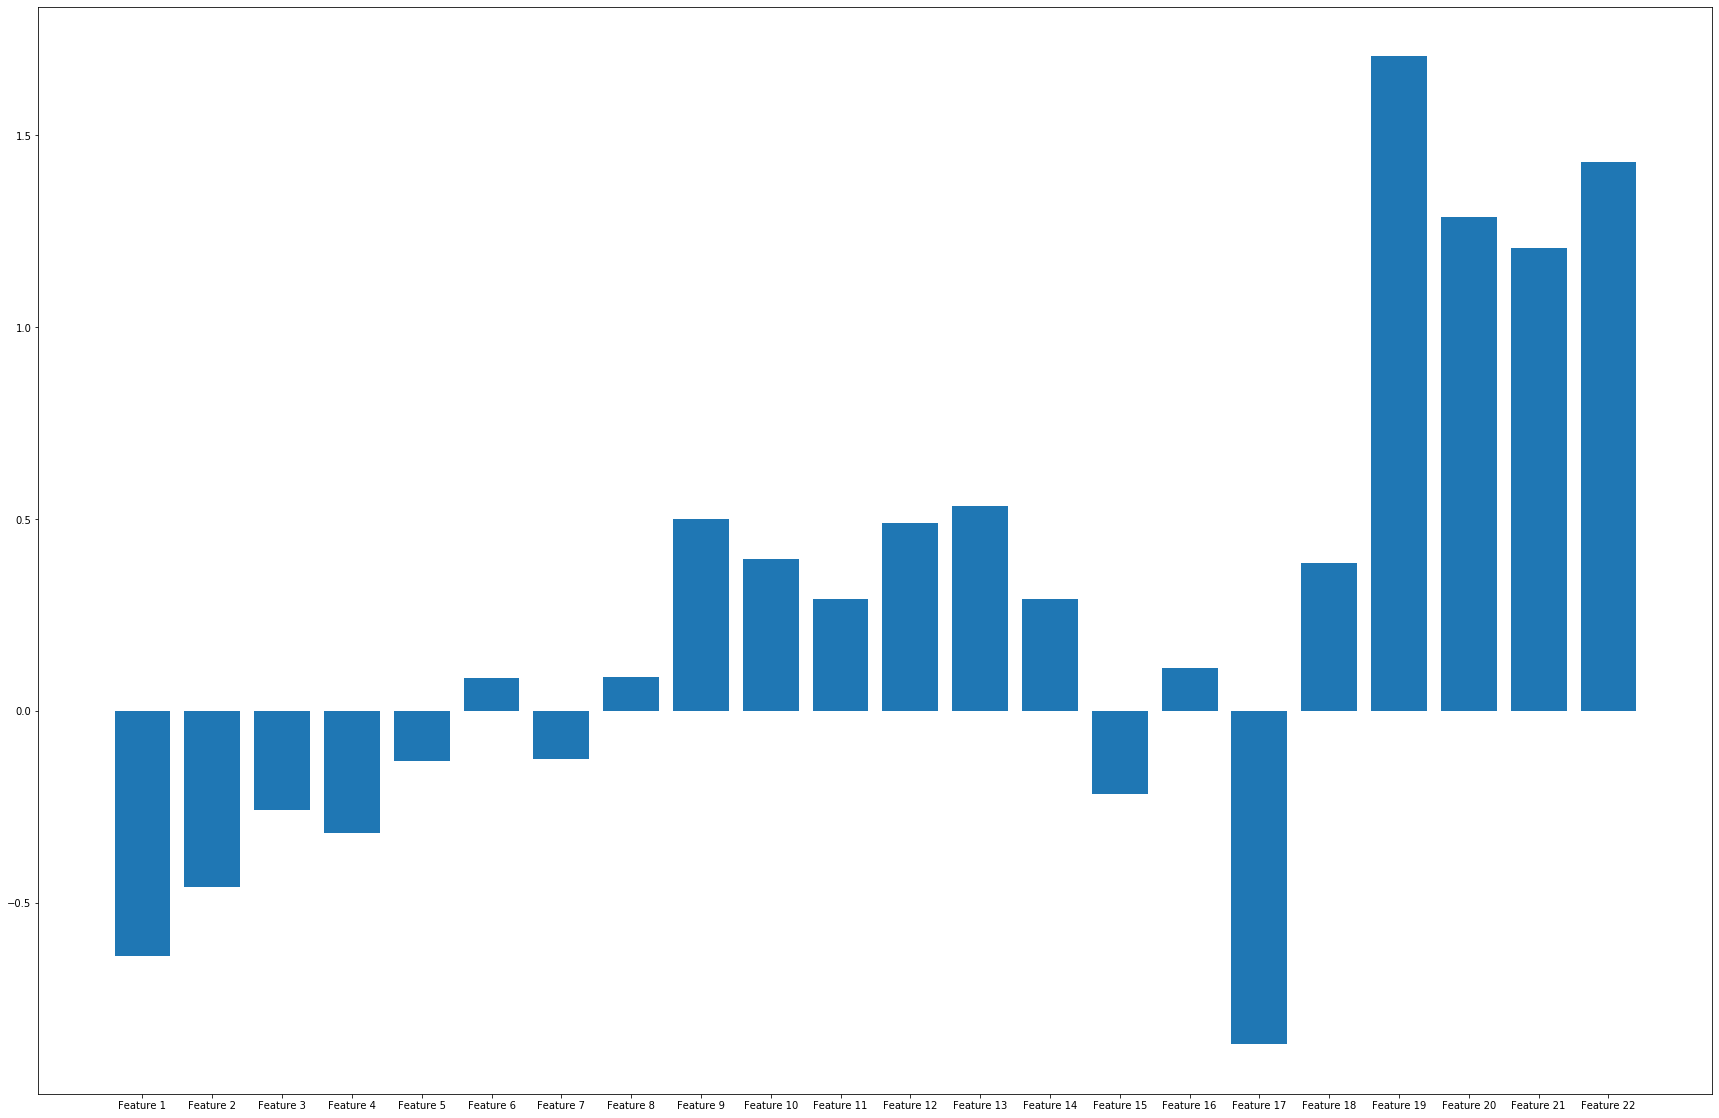

In [12]:
plt.figure(figsize=(30,20))
plt.bar(["Feature 1","Feature 2","Feature 3","Feature 4","Feature 5","Feature 6","Feature 7","Feature 8","Feature 9","Feature 10","Feature 11","Feature 12","Feature 13","Feature 14","Feature 15","Feature 16","Feature 17","Feature 18","Feature 19","Feature 20","Feature 21","Feature 22"],importance)

### Initialize a Random Forest Classifier

In [29]:
model_randomForest = RandomForestClassifier()
model_randomForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
y_pred_randomForest = model_randomForest.predict(x_test)

In [31]:
print(round(accuracy_score(y_test, y_pred_randomForest)*100,2))

94.87


In [32]:
print(classification_report(y_test, y_pred_randomForest, target_names=['Sick','Not sick']))

              precision    recall  f1-score   support

        Sick       0.90      0.90      0.90        10
    Not sick       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



Random Forest has a better precision, recall, f1-score and accuracy than the logistic regression.